In [1]:
from tight_binding2.utilitities import compute_reciprocal_lattice_vectors_2D
from tight_binding2.hamiltonians import kagome_hamiltonian_driven, kagome_hamiltonian_static, square_hamiltonian_driven, square_hamiltonian_static
from tight_binding2.diagonalise import compute_time_evolution, compute_eigenstates
from tight_binding2.bandstructure import compute_bandstructure2D, plot_bandstructure2D
from tight_binding2.topology import compute_zak_phase, locate_dirac_strings
import numpy as np

#KAGOME
#a_1 = np.transpose(np.array([[1,0]]))
#a_2 = np.transpose(np.array([[0.5, 0.5*3**0.5]]))
#a_3 = a_2 - a_1
#r_a = a_3 / 2
#r_b = a_2 / 2
#r_c = a_1 / 2
#offsets = np.array([r_a, r_b, r_c])

#SQUARE
a_1 = np.transpose(np.array([[1,0]]))
a_2 = np.transpose(np.array([[0,1]]))
r = np.transpose(np.array([[0,0]]))
offsets = np.array([r,r,r])

H = square_hamiltonian_driven(0,1,-1,0,0,0,1,1,1,0,0,0,1,3,0,1,0)

energies, blochvectors = compute_bandstructure2D(H,a_1,a_2,100,3,100)

In [2]:
print(energies)

[[[-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]
  ...
  [-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]]

 [[-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]
  ...
  [-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]]

 [[-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]
  ...
  [-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]]

 ...

 [[-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]
  ...
  [-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]]

 [[-2.0943951  0.         2.0943951]
  [-2.0943951  0.         2.0943951]


In [3]:
energies_sorted = np.zeros(energies.shape, dtype='float')
blochvectors_sorted = np.zeros(blochvectors.shape, dtype='complex')
for i in range(energies.shape[0]):
    for j in range(energies.shape[1]):
        if i == 0 and j == 0:
            current_energies = energies[i,j]
            ind = np.argsort(current_energies)
            energies_sorted[i,j] = energies[i,j, ind]
            blochvectors_sorted[i,j] = blochvectors[i,j,:,ind]
            previous_energies = current_energies[ind]
        else:
            current_energies = energies[i,j]
            ind = np.argsort(current_energies)
            differences = np.zeros((3,), dtype='float')
            for shift in range(3):
                ind_roll = np.roll(ind,shift)
                diff = (current_energies[ind_roll] - previous_energies) % (2*np.pi)
                diff = (diff + 2*np.pi*np.floor((-np.pi-diff) 
                                                / (2*np.pi) + 1))
                diff = np.abs(diff)
                diff = np.sum(diff)
                differences[shift] = diff
            minimum = np.argmin(differences)
            ind = np.roll(ind, minimum)
            energies_sorted[i,j] = energies[i,j, ind]
            blochvectors_sorted[i,j] = blochvectors[i,j,:,ind]
            previous_energies = current_energies[ind]

In [4]:
energies_sorted

array([[[-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951],
        ...,
        [-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951]],

       [[-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951],
        ...,
        [-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951]],

       [[-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951],
        ...,
        [-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951]],

       ...,

       [[-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  0.       ,  2.0943951],
        [-2.0943951,  

c:\Users\laure\OneDrive\Bureaublad\partIII\TopologicalTightBinding\tight_binding2\bandstructure.py:173: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim(np.nanmin(E),np.nanmax(E))


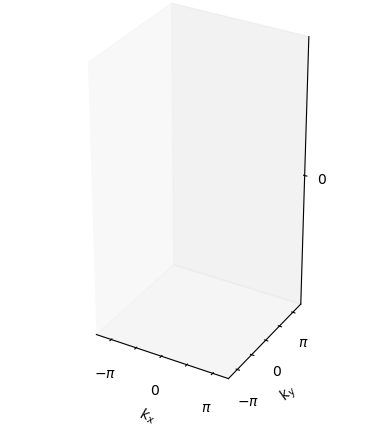

In [5]:
plot_bandstructure2D(energies_sorted, a_1, a_2, 'test.png')